# Reinforcement learning

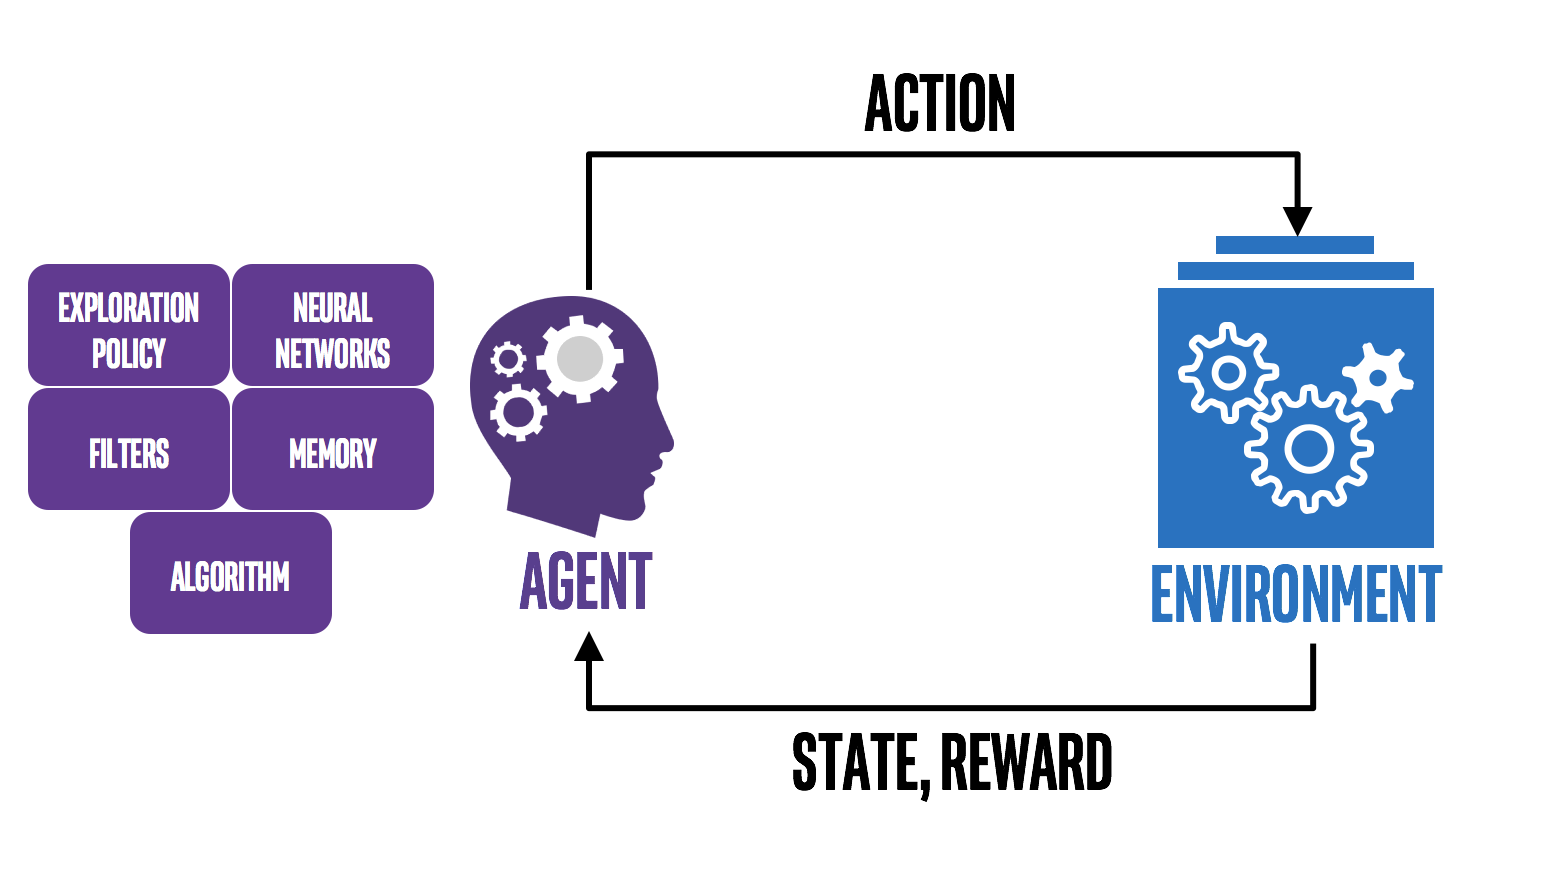

# How Do We Define Reinforcement Learning?

Reinforcement Learning is a subfield of machine learning that teaches an agent how to choose an action from its action space, within a particular environment, in order to maximize rewards over time.

1.Agent: The program you train, with the aim of doing a job you specify.

2.Environemnt: The world, real or virtual, in which the agent performs actions.

3.Action: A move made by the agent, which causes a status change in the environment.

4.Rewards: The evaluation of an action, which can be positive or negative.

# Example: Controlling A Walking Robot

1.Agent: The program controlling a walking robot.
    
2.Environment: The real world.
    
3.Action: One out of four moves (1) forward; (2) backward; (3) left; and (4) right.
    
4.Reward: Positive when it approaches the target destination; negative when it wastes time, goes in the wrong direction or falls down.

# Markov Property
The state of X at time t+1 only depends on one preceding state of X at time t, and is independent of past states X(t−1), …, X(1).

# Markov chain

Assume we start separately from state e, a, and t, with the respective probability of 40%, 30%, and 30%. 
For example, we have a 40% probability of starting with e at time 0. Then we move from state e to state a at time 1 to get ea. To arrive at the word eat, we move directly from state a to state t at time 2, without regard for the earlier state e.


# Markov Decision process

Markov Decision Process differs from the Markov Chain in that it brings actions into play. This means the next state is related not only to the current state itself but also to the actions taken in the current state. Moreover, in MDP, some actions that correspond to a state can return rewards.

The aim of MDP is to train an agent to find a policy that will return the maximum cumulative rewards from taking a series of actions in one or more states.

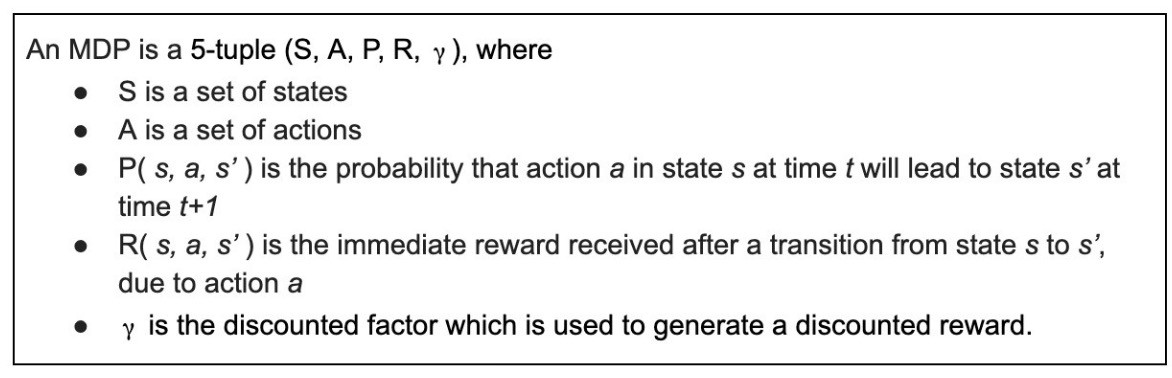

# Q learning

The Q-learning algorithm is centred around the actor and starts exploring based on trial-and-error to update its knowledge about the model and hence path to the best reward. The core of the idea is the Q-matrix Q(s, a). It contains the maximum discounted future reward when we perform action a in state s. Or in other words Q(s, a) gives estimates the best course of action a in state s. Q-learning learns by trail and error and updates its policy (Q-matrix) based on reward. to state it simple: the best it can do given a state it is in.
After every step we update Q(s,a) using the reward, and the max Q value for new state resulting from the action. This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values).
The Bellman equation is extended with a learning rate (if you put learning rate = 1 it comes back to the basic Bellman equation) 

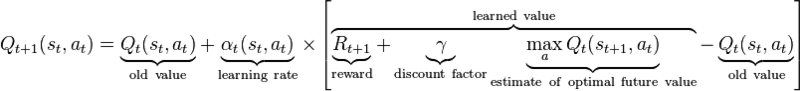

In [25]:
import gym
import numpy as np
import random
import time
from IPython.display import clear_output

In [26]:
env = gym.make('Taxi-v3')

# Training

In [27]:
NUM_ACTIONS = env.action_space.n
NUM_STATES = env.observation_space.n
Q = np.zeros([NUM_STATES, NUM_ACTIONS]) #You could also make this dynamic if you don't know all games states upfront
gamma = 0.9 # discount factor
alpha = 0.9 # learning rate
for episode in range(1,1001):
    done = False
    rew_tot = 0
    obs = env.reset()
    while done != True:
            action = np.argmax(Q[obs]) #choosing the action with the highest Q value 
            obs2, rew, done, info = env.step(action) #take the action
            Q[obs,action] += alpha * (rew + gamma * np.max(Q[obs2]) - Q[obs,action]) #Update Q-marix using Bellman equation
            #Q[obs,action] = rew + gamma * np.max(Q[obs2]) # same equation but with learning rate = 1 returns the basic Bellman equation
            rew_tot = rew_tot + rew
            obs = obs2   
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode,rew_tot))

Episode 50 Total Reward: -80
Episode 100 Total Reward: 12
Episode 150 Total Reward: 11
Episode 200 Total Reward: 10
Episode 250 Total Reward: 13
Episode 300 Total Reward: -5
Episode 350 Total Reward: 11
Episode 400 Total Reward: 4
Episode 450 Total Reward: 4
Episode 500 Total Reward: 7
Episode 550 Total Reward: 6
Episode 600 Total Reward: 12
Episode 650 Total Reward: 4
Episode 700 Total Reward: 9
Episode 750 Total Reward: 11
Episode 800 Total Reward: 6
Episode 850 Total Reward: 6
Episode 900 Total Reward: 10
Episode 950 Total Reward: 3
Episode 1000 Total Reward: 9


# Testing

In [28]:
rew_tot=0
obs= env.reset()
env.render()
done=False
while done != True: 
    action = np.argmax(Q[obs])
    obs, rew, done, info = env.step(action) #take step using selected action
    rew_tot = rew_tot + rew
    env.render()
#Print the reward of these actions
print("Reward: %r" % rew_tot)  

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |

# Highway env

In [33]:
import gym
import highway_env

env = gym.make("highway-v0")
total_actions = env.action_space
total_observations = env.observation_space
done = False

for i in range(10):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    env.render()
env.close()




'\nfor i in range(10):\n    action = env.action_space.sample()\n    obs, reward, done, info = env.step(action)\n    env.render()\nenv.close()\n\n'

In [34]:
total_actions

Discrete(5)

In [35]:
total_observations

Box(5, 5)